In [1]:
import pandas as pd
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt

In [19]:
m.rcParams.update({"font.size": 24, "legend.fontsize": 18, 'pdf.fonttype': 42, 'ps.fonttype': 42})

IceLake package Mean: 0.9974 +- 0.2765
IceLake dram Mean: 0.9999 +- 0.2644


C:\Users\lukas\AppData\Local\Temp\ipykernel_28952\3265507499.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\lukas\AppData\Local\Temp\ipykernel_28952\3265507499.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Broadwell package Mean: 1.0009 +- 0.0417
Broadwell dram Mean: 1.0099 +- 0.1051


C:\Users\lukas\AppData\Local\Temp\ipykernel_28952\3265507499.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\lukas\AppData\Local\Temp\ipykernel_28952\3265507499.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


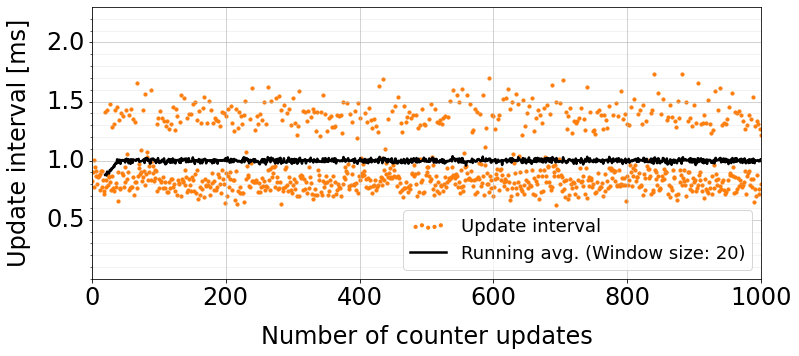

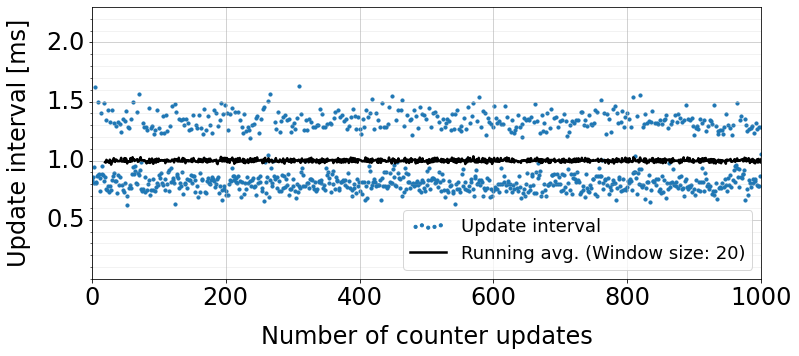

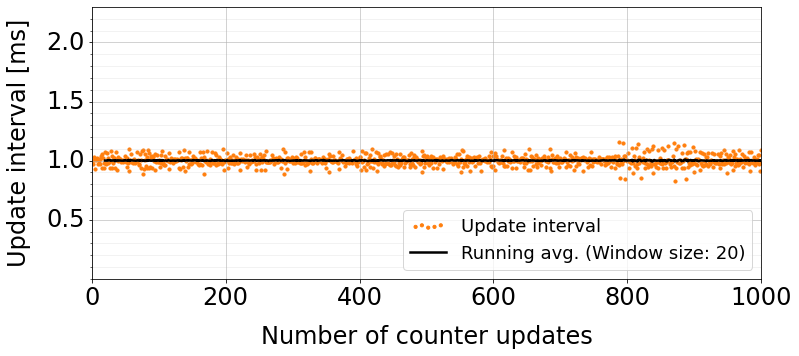

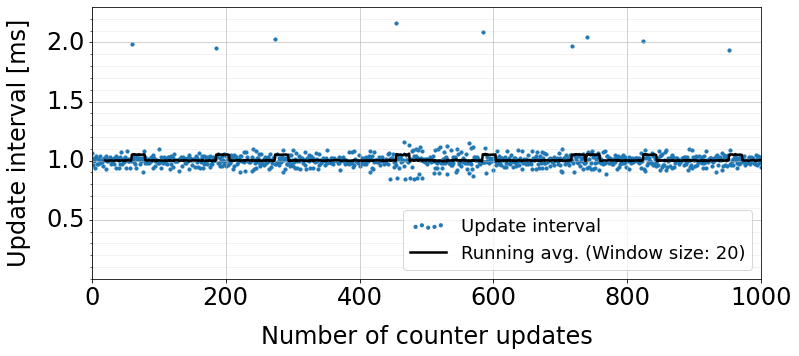

In [20]:
for platform in ["IceLake", "Broadwell"]:
    df = pd.read_csv(f"RAPL_Update_Interval_{platform}.csv").iloc[:1000]
    for color, domain in zip(["tab:orange", "tab:blue"], ["package", "dram"]):
        fig, ax = plt.subplots(figsize=(12,5))
        ax.scatter(df["index"], df[f"{domain}_ms"], color=color, s=10, label="Update interval")
        ax.plot(df["index"], df[f"{domain}_ms"].rolling(20).mean(), color="black", linewidth=2.5, label="Running avg. (Window size: 20)")
        mean = np.mean(df[f"{domain}_ms"])
        std = np.std(df[f"{domain}_ms"])
        print(platform, domain, f"Mean: {mean:0.4f} +- {std:0.4f}")
        ax.set_ylim(0, 2.3)
        ax.set_xlim(left=0, right=1000)
        ax.set_ylabel("Update interval [ms]", labelpad=15)
        ax.set_xlabel("Number of counter updates", labelpad=15)
        ax.set_yticks(np.arange(ax.get_ylim()[0] + 0.5, ax.get_ylim()[1], 0.5))
        ax.set_yticklabels(ax.get_yticklabels(), va="center")
        ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 0.1), minor=True)
        ax.grid(which="minor", alpha=.2)
        ax.grid(which="major", alpha=.7)
        ax.legend(loc="lower right", scatterpoints=5, ncol=1)
        fig.show()
        fig.savefig(f"RAPL_Update_Interval_{platform}_{domain}.pdf", bbox_inches="tight")